## About the data
This is a campaign data of Food Mart (chain of convenience stores in US) where each record is a transaction of a customer in response to a campaign and their corresponding cost incurred to acquire the customer for that campaign.

## Columns
1. food_category- food type
2. food_department- department the food belongs to
3. food_family- family the food belongs to
4. store_sales- sales in million dollars 
5. store_cost- expenses in million dollars
6. unit_sales - quantity of sales in millions 
7. promotion_name- name used for promotion
8. sales_country- country where sale happen
9. marital_status- marital status of customer
10. gender- gender of customer
11. total_children- total children in home
12. education- education level of customer
13. member_card- member card of customer
14. occupation- occupation of customer
15. houseowner- if customer is a house owner or not 
16. avg_cars_at_home- average number of cars at customer's house
17. avg.yearly_income- yearly income range of customer
18. num_children_at_home- number of children for customer
19. brand_name- brand name of product purchase
20. SRD- Max retail price of item
21. gross_weight- gross weight of item 
22. net_weight- net weight of item
23. recyclable_package- whether the food item is in a recyclable packaging or not
24. low_fat - whether the food item is low on fat or not 
25. units_per_case- number of units per case available on store shelves
26. store_type - type of store
27. store_city - city where store belongs
28. store_state- state where store belongs 
29. store_sqft- store area in sqft
30. grocery_sqft- grocery area available in sqft
31. frozen_sqft- frozen food area available in sqft
32. meat_sqft- meat area available in sqft
33. cofee_bar- coffee bar available in store or not
34. video_store- video store available in store or not 
35. salad_bar- salad bar counter available in store or not 
36. prepared_food- prepared food available in store or not
37. florist- flower shelves available in store or not
38. media_type- media source for campaign
39. cost- cost on acquiring the customer in dollars



## Hypothesis to be tested via EDA
1. Do we have a better response rate based on the cost of the campaign? <br>
2. How is the spread of per transaction cost for a campaign and store and how does the response rate in accordance to the per transaction cost? <br>
3. How does each media type, store and product mix influence demand? <br>
    a. Is there a media type which garners more demand and which media has a beter cost per transaction? <br>
    b. Is there a store which gets better demand for its cost? <br>
    c. Which product is fast moving across countries? <br>
4. How does the product features influence demand? <br>
    a. Does price and brand influence demand? <br>
    b. Do we have health conscious customers? <br>
5. How does the store specific features influence demand? <br>
    a. Does demand increase with size of store? <br>
    b. What are the top sales making department in the store? <br>
    c. Which country has higher number of stores and sales? <br>
6. What is the customer demographics to target? <br>
    a. What is the percentage of demand from members? <br>
    b. Does this mart cater to high income customers? <br>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import squarify
pd.set_option('display.max_columns', None)

In [2]:
cac_data=pd.read_csv('cac_data.csv')
cac_data.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,4.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [3]:
store_features = [
    "store_type",
    "store_city",
    "store_state",
    "store_sqft",
    "grocery_sqft",
    "frozen_sqft",
    "meat_sqft",
    "coffee_bar",
    "video_store",
    "salad_bar",
    "prepared_food",
    "florist",
]

product_features = [
    "food_category",
    "food_department",
    "food_family",
    "brand_name",
    "SRP",
    "gross_weight",
    "net_weight",
    "recyclable_package",
    "low_fat",
    "units_per_case",
]

customer_features = [
    "marital_status",
    "gender",
    "total_children",
    "education",
    "member_card",
    "occupation",
    "houseowner",
    "avg_cars_at home(approx)",
    "avg. yearly_income",
    "num_children_at_home"
]

promotion_features = ["promotion_name", "media_type"]

store_and_product_features = [
    "store_sales(in millions)",
    "store_cost(in millions)",
    "unit_sales(in millions)",
]

In [4]:
store_data=cac_data.loc[:,store_features].drop_duplicates().reset_index(drop=True)
promotion_data=cac_data.loc[:,promotion_features].drop_duplicates().reset_index(drop=True)
product_data=cac_data.loc[:,product_features].drop_duplicates().reset_index(drop=True)
customer_data=cac_data.loc[:,customer_features].drop_duplicates().reset_index(drop=True)

In [5]:
intermediate_data=(cac_data.drop(columns='avg_cars_at home(approx).1'))
intermediate_data=intermediate_data.merge((store_data.assign(store_id=lambda df: np.arange(len(df))).set_index(store_features)
                                           ),on=store_features,).drop(columns=store_features)
intermediate_data=intermediate_data.merge((customer_data.assign(customer_id=lambda df: np.arange(len(df))).set_index(customer_features)
                                           ),on=customer_features,).drop(columns=customer_features)
intermediate_data=intermediate_data.merge((product_data.assign(product_id=lambda df: np.arange(len(df))).set_index(product_features)
                                           ),on=product_features,).drop(columns=product_features)
intermediate_data=intermediate_data.merge((promotion_data.assign(promotion_id=lambda df: np.arange(len(df))).set_index(promotion_features)
                                           ),on=promotion_features,).drop(columns=promotion_features)

sales_data=intermediate_data.drop(columns=['cost','customer_id']).drop_duplicates()

cost_data=intermediate_data.drop(columns=[        "store_sales(in millions)",
        "store_cost(in millions)",
        "unit_sales(in millions)"])

In [6]:
intermediate_data.head()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),sales_country,cost,store_id,customer_id,product_id,promotion_id
0,7.36,2.7232,4.0,USA,126.62,0,0,0,0
1,8.91,4.0095,3.0,USA,126.62,0,0,31,0
2,10.74,4.1886,3.0,USA,126.62,0,0,219,0
3,4.74,1.8960,3.0,USA,126.62,0,1305,620,0
4,7.08,2.1240,4.0,USA,126.62,0,213,642,0


In [7]:
cost_data.head()

,sales_country,cost,store_id,customer_id,product_id,promotion_id
0,USA,126.62,0,0,0,0
1,USA,126.62,0,0,31,0
2,USA,126.62,0,0,219,0
3,USA,126.62,0,1305,620,0
4,USA,126.62,0,213,642,0


In [8]:
sales_data.head()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),sales_country,store_id,product_id,promotion_id
0,7.36,2.7232,4.0,USA,0,0,0
1,8.91,4.0095,3.0,USA,0,31,0
2,10.74,4.1886,3.0,USA,0,219,0
3,4.74,1.8960,3.0,USA,0,620,0
4,7.08,2.1240,4.0,USA,0,642,0


In [9]:
promotion_data.head()

,promotion_name,media_type
0,Bag Stuffers,"Daily Paper, Radio"
1,Cash Register Lottery,"Daily Paper, Radio"
2,High Roller Savings,"Daily Paper, Radio"
3,Cash Register Lottery,In-Store Coupon
4,Double Down Sale,Radio


### 1. Do we have a better response rate based on the cost of campaign?

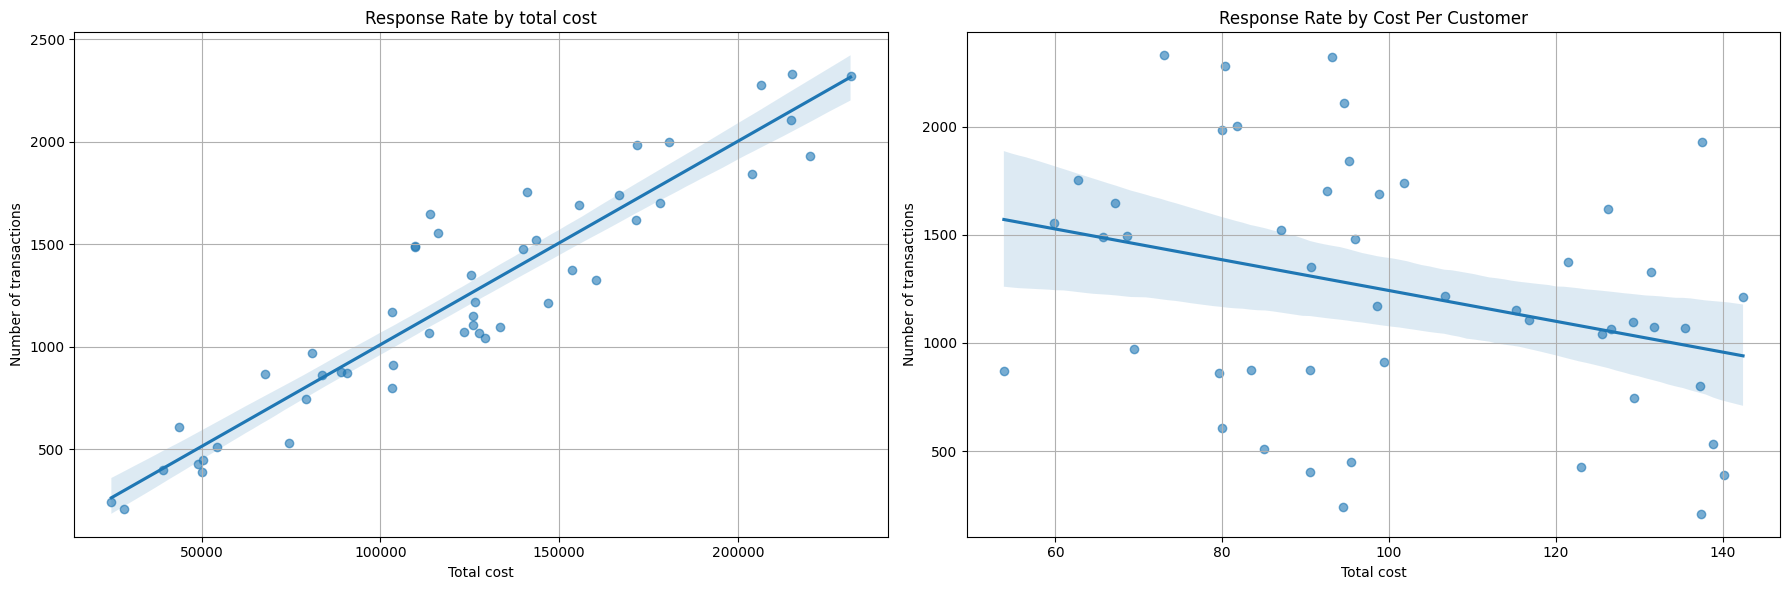

In [10]:
viz_1=cost_data.merge(promotion_data,left_on='promotion_id',right_index=True)
result_viz_1=viz_1.groupby('promotion_name').agg(
    total_costs=('cost','sum'),
    cost_per_customer=('cost','median'),
    n_transactions=('promotion_name','size'),
    n_stores=('store_id','nunique'),
    cost_spread=('cost',lambda x:x.max()-x.min())
).sort_index().reset_index()

fig,axs=plt.subplots(1,2,figsize=(18,6))

sns.regplot(x='total_costs',y='n_transactions',data=result_viz_1,scatter_kws={'alpha':0.6},ax=axs[0])
axs[0].set_title('Response Rate by total cost')
axs[0].set_xlabel('Total cost')
axs[0].set_ylabel('Number of transactions')
axs[0].grid(True)

sns.regplot(x='cost_per_customer',y='n_transactions',data=result_viz_1,scatter_kws={'alpha':0.6},ax=axs[1])
axs[1].set_title('Response Rate by Cost Per Customer')
axs[1].set_xlabel('Total cost')
axs[1].set_ylabel('Number of transactions')
axs[1].grid(True)

plt.tight_layout()
plt.show()

### 2. How is the spread of per transaction cost for a campaign and store and how does the response rate in accordance to the per transaction cost?

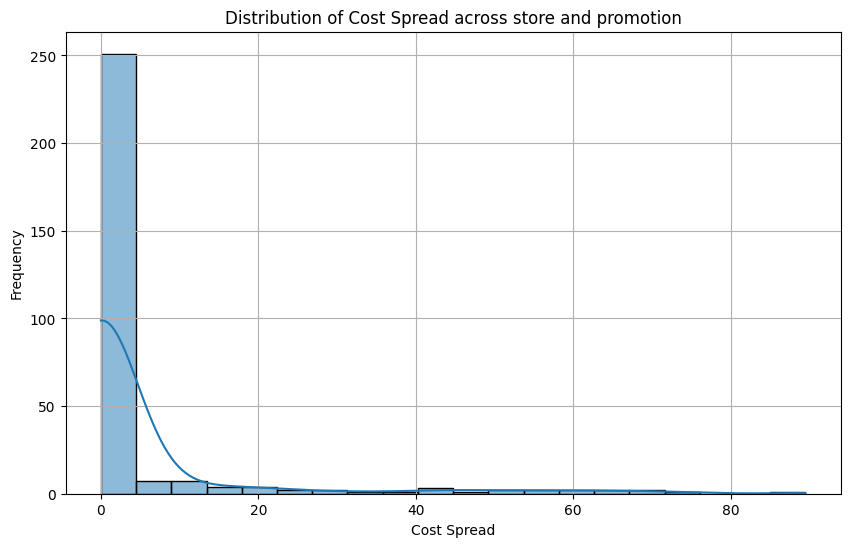

In [11]:
cost_spread=viz_1.groupby(['store_id','promotion_name']).agg(
    cost_spread=('cost',lambda x:x.max()-x.min())
).sort_index().reset_index()

plt.figure(figsize=(10,6))
sns.histplot(cost_spread['cost_spread'],bins=20,kde=True)
plt.title('Distribution of Cost Spread across store and promotion')
plt.xlabel('Cost Spread')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [12]:
viz_1.head()

,sales_country,cost,store_id,customer_id,product_id,promotion_id,promotion_name,media_type
0,USA,126.62,0,0,0,0,Bag Stuffers,"Daily Paper, Radio"
1,USA,126.62,0,0,31,0,Bag Stuffers,"Daily Paper, Radio"
2,USA,126.62,0,0,219,0,Bag Stuffers,"Daily Paper, Radio"
3,USA,126.62,0,1305,620,0,Bag Stuffers,"Daily Paper, Radio"
4,USA,126.62,0,213,642,0,Bag Stuffers,"Daily Paper, Radio"


### 3. How does each media type, store and product mix influence demand?
#### 3 a. Is there a media type which garners more demand and which media has a beter cost per transaction?

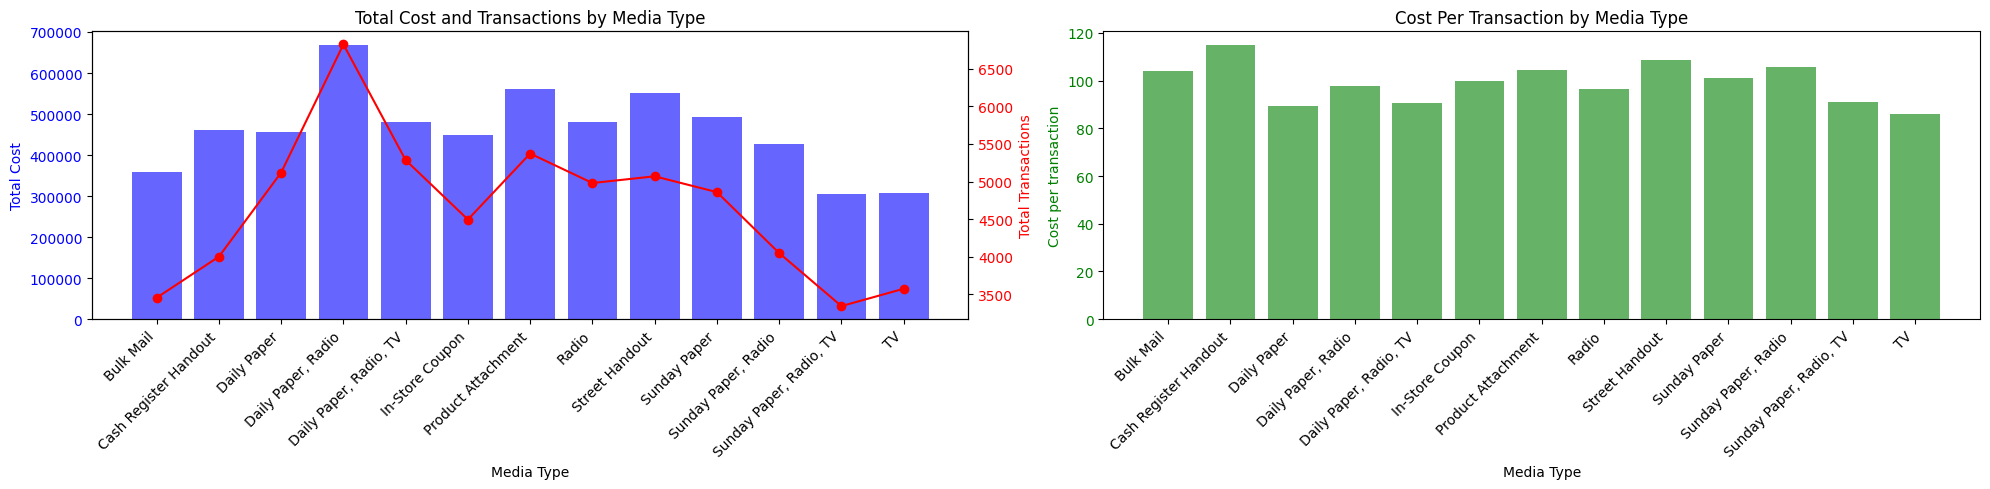

In [13]:
target_data=cost_data.merge(product_data,left_on='product_id',right_index=True)
result_viz_2=viz_1.groupby('media_type').agg(
    total_transactions=('media_type','size'),
    total_cost=('cost','sum')
)
result_viz_2['cost_per_transaction'] = result_viz_2['total_cost']/result_viz_2['total_transactions']

fig,(ax1,ax3)=plt.subplots(1,2,figsize=(20,5))

ax1.bar(result_viz_2.index,result_viz_2['total_cost'],color='b',alpha=0.6)
ax1.set_xlabel('Media Type')
ax1.set_ylabel('Total Cost',color='b')
ax1.tick_params(axis='y',labelcolor='b')

ax2=ax1.twinx()
ax2.plot(result_viz_2.index,result_viz_2['total_transactions'],color='r',marker='o')
ax2.set_ylabel('Total Transactions',color='r')
ax2.tick_params(axis='y',labelcolor='r')

ax1.set_xticks(range(len(result_viz_2.index)))
ax1.set_xticklabels(result_viz_2.index,rotation=45,ha='right')
ax1.set_title('Total Cost and Transactions by Media Type')


ax3.bar(result_viz_2.index,result_viz_2['cost_per_transaction'],color='g',alpha=0.6)
ax3.set_xlabel('Media Type')
ax3.set_ylabel('Cost per transaction',color='g')
ax3.tick_params(axis='y',labelcolor='g')

ax3.set_xticks(range(len(result_viz_2.index)))
ax3.set_xticklabels(result_viz_2.index,rotation=45,ha='right')
ax3.set_title('Cost Per Transaction by Media Type')

plt.tight_layout()
plt.show()

#### 3 b. Is there a store which gets better demand for its cost? 

In [14]:
target_data.head()

,sales_country,cost,store_id,customer_id,product_id,promotion_id,food_category,food_department,food_family,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case
0,USA,126.62,0,0,0,0,Breakfast Foods,Frozen Foods,Food,Carrington,1.84,19.7,17.7,1.0,0.0,17.0
615,USA,59.86,0,1,0,1,Breakfast Foods,Frozen Foods,Food,Carrington,1.84,19.7,17.7,1.0,0.0,17.0
1341,USA,84.16,0,2,0,2,Breakfast Foods,Frozen Foods,Food,Carrington,1.84,19.7,17.7,1.0,0.0,17.0
1569,USA,95.78,0,3,0,3,Breakfast Foods,Frozen Foods,Food,Carrington,1.84,19.7,17.7,1.0,0.0,17.0
1823,USA,69.65,1,20,0,12,Breakfast Foods,Frozen Foods,Food,Carrington,1.84,19.7,17.7,1.0,0.0,17.0


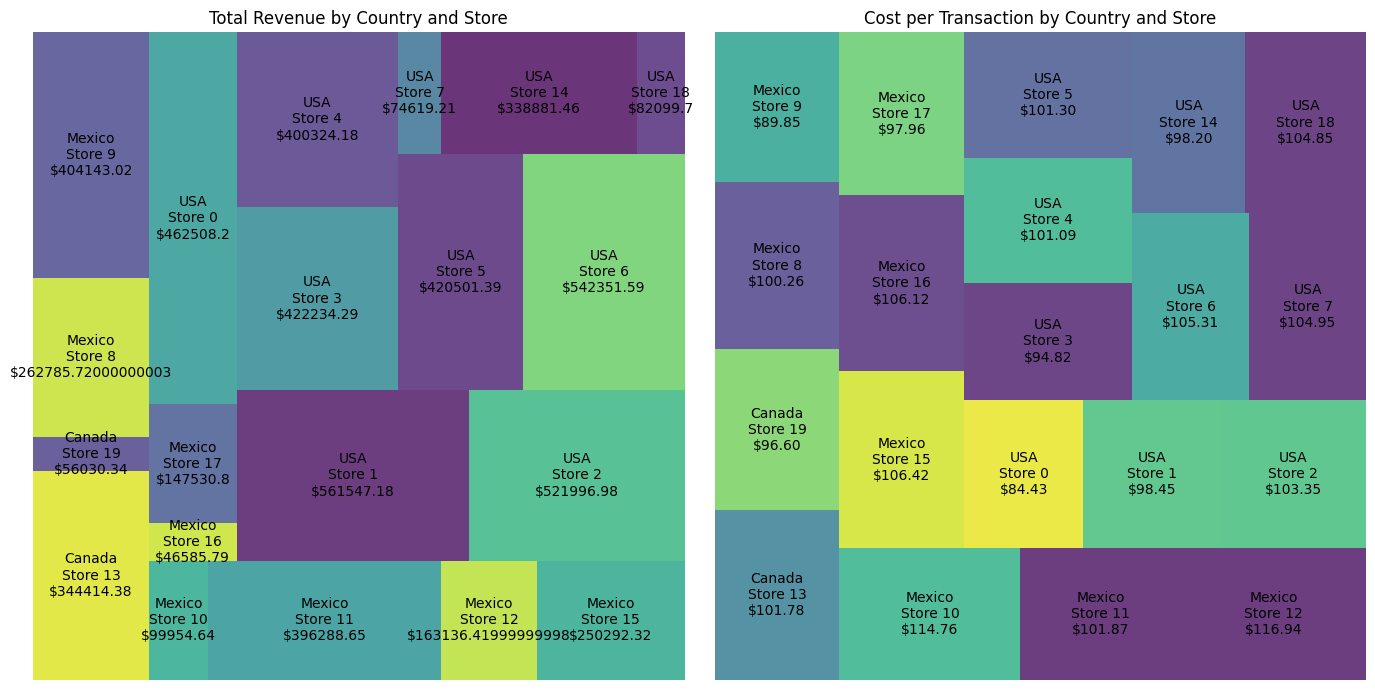

In [15]:
store_summary=target_data.groupby(['sales_country','store_id']).agg(
    total_revenue=('cost','sum'),
    num_transactions=('cost','count')
).reset_index()

store_summary['cost_per_transaction']=store_summary['total_revenue']/store_summary['num_transactions']


# Create treemaps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Treemap for Total Revenue
sizes = store_summary['total_revenue']
labels = store_summary.apply(lambda x: f"{x['sales_country']}\nStore {x['store_id']}\n${x['total_revenue']}", axis=1)
squarify.plot(sizes=sizes, label=labels, ax=ax1, alpha=.8)
ax1.set_title('Total Revenue by Country and Store')
ax1.axis('off')

# Treemap for Cost per Transaction
sizes = store_summary['cost_per_transaction']
labels = store_summary.apply(lambda x: f"{x['sales_country']}\nStore {x['store_id']}\n${x['cost_per_transaction']:.2f}", axis=1)
squarify.plot(sizes=sizes, label=labels, ax=ax2, alpha=.8)
ax2.set_title('Cost per Transaction by Country and Store')
ax2.axis('off')

plt.tight_layout()
plt.show()

#### 3 c. Which product is fast moving across countries? <br>

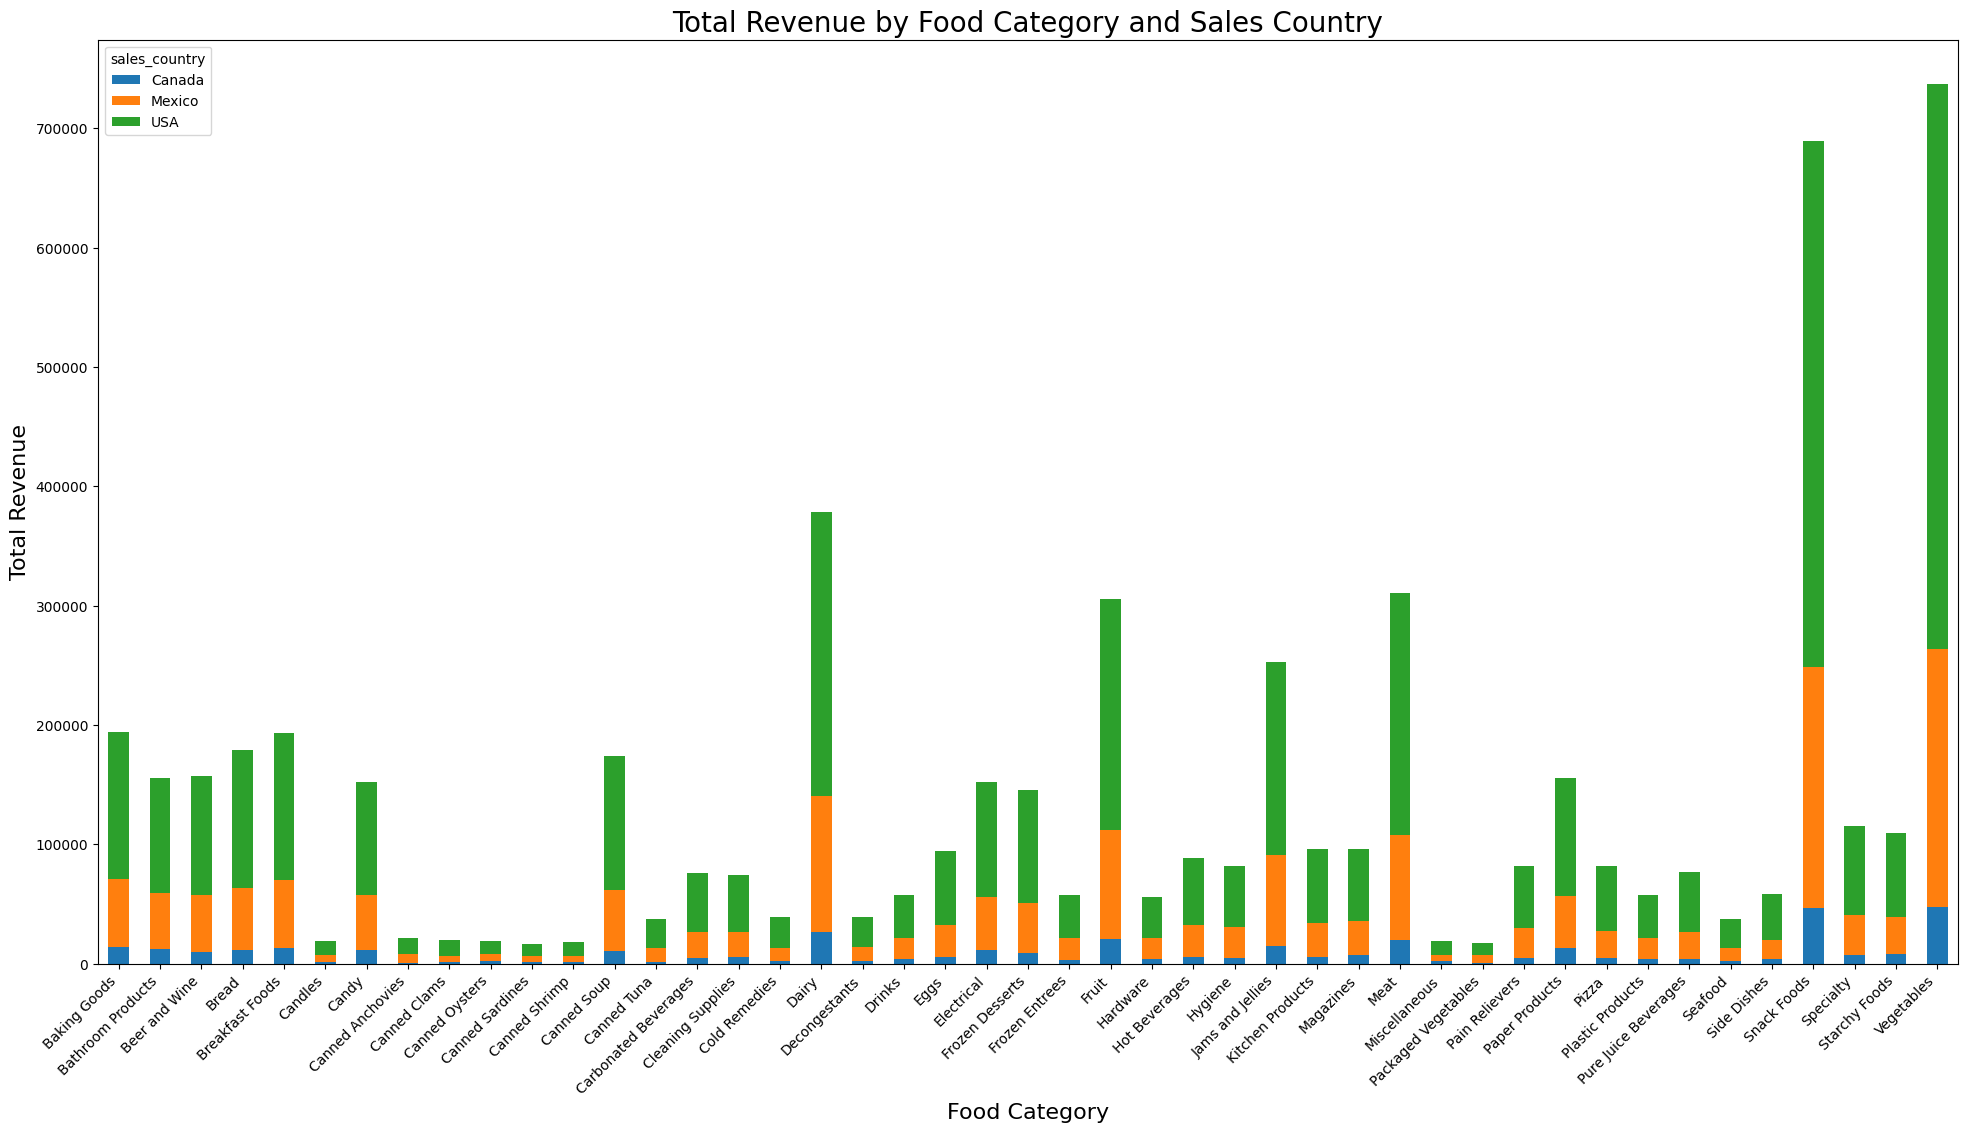

In [29]:
country_food_summary=target_data.groupby(['sales_country','food_category']).agg(
    total_revenue=('cost','sum'),
    num_transactions=('cost','count')
).reset_index()


fig, ax = plt.subplots(figsize=(24, 12))
pivot_data = country_food_summary.pivot(index='food_category', columns='sales_country', values='total_revenue')
pivot_data.plot(kind='bar', stacked=True, ax=ax)


ax.set_title('Total Revenue by Food Category and Sales Country', fontsize=20)
ax.set_xlabel('Food Category', fontsize=16)
ax.set_ylabel('Total Revenue', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()